# **Deep Learning Term Project**
## **AI generated Image Classification**

### GITHUB : https://github.com/kmj0825/DL_Project

---

## **1.개요**


### 1. 문제 분석
- 현재 생성 AI 를 이용하여 만들어지는 이미지가 엄청나게 증가하고 있는 상황
- 생성된 이미지 인지 실제 이미지 인지 사람이 구별하기 어려운 문제가 다수 발생


<img src = "https://drive.google.com/uc?id=1gwrWY9N39PqSKCEif3mC7YpCwZs7u6nr"  width = 1000>

<img src = "https://drive.google.com/uc?id=1Qb7plPSZKF3OGt291cmvdn3DMc7FZlhn"  width = 1000>

- 위와 같은 상황에서 AI 생성 이미지를 판별하는 것은 중요한 문제점 중 하나라고 판단하였습니다. 

### 2. 주제 선정
#### **생성 이미지 판별에 적합한 모델은 무엇일까?**
- 현재 고화질로 생성되는 이미지에 대해서 판별해주는 모델은 명확히 존재하지 않습니다. 

<img src = "https://drive.google.com/uc?id=1kJApbqhukRK94XehZHht1c88ISO2jUPs" width = 1000>
<img src = "https://drive.google.com/uc?id=1A5TvoI3GNFytZkx0WmcLE8Kl_UMQnZR1" width = 1000>

- 위와 같은 사이트에서도 진위 판별만 제공하고 있고, 어떤 모델을 사용하여 판별하는지는 제공하지 않고 있는 상황
- 현재 Image Classification 문제에서 가장 성능이 좋은 모델(CIFAR-10)은 ViT-L/16, DINOv2 과 같은 Vision Transformer 기반
  - ImageNet Dataset 의 경우에도 BASIC-L, CoCa 와 같은 Transformer 기반 방식이 성능이 좋음
- Generated Image Classification 에서도 Vision Transformer 방식이 다른 방식의 모델들 보다 성능이 뛰어날 것인지 검증
- 생성 이미지를 판단할 때, 어떤 부분을 보고 결정하는지에 대한 시각화의 필요성 - CAM 사용


### 3. 진행 과정 

#### 데이터 셋 설명
##### **CIFAKE 데이터셋**

<img src = "https://drive.google.com/uc?id=1t45T4v6W5QFQD5xUuKIM0FW1eGXkb25I"  width = 1000>
<img src = "https://drive.google.com/uc?id=1IKZvEkDUeROear1xwTX5c-Byv61lB4A8"  width = 1000>

- 데이터셋 선정 이유
CIFAR-10 데이터셋은 이미지 분류 딥러닝 모델에 대한 성능을 측정할 때, 가장 기본적으로 사용하는 데이터셋입니다. 기본적인 데이터부터 합성 데이터를 판별해 나가고자 하여 이 데이터셋을 선정하였고, 이후 고화질의 데이터셋으로 확장해나가고자 합니다. 
- 데이터셋 구성
    - 이 데이터셋은 10개의 클래스로 구성된 32 x 32 RGB 이미지 데이터로 구성되어 있습니다.
    - CIFAR-10 에서 수집한 60,000개의 실제 이미지와 실제 이미지를 바탕으로 생성된  60,000개의 합성(가짜)이미지로 구성된 데이터셋입니다.
    - 실제 데이터 수집 Class Label : ‘REAL’ or Positive class ‘1’  Krizhevsky & Hinton's CIFAR-10 dataset 에서 수집
    - 합성 데이터 생성  Class Label : ‘FAKE’ or Negative class ‘0’ CIFAR-10 을 바탕으로 Stable Diffusion version 1.4 를 이용하여 생성

## **2.모델 선정**
##### CIFAKE 논문에서는 기본적인 CNN 을 사용하여  Filter 수를 조정해가며 학습 및 평가 
#####  : CIFAKE 데이터셋이 단순하여 기본 CNN 이 유효한 성능을 가졌지만 고화질로 갈수록 문제가 있을 것이라 판단하여 더 높은 화질을 가진 데이터셋에서도 성능이 유효할 모델로 선정


<img src = "https://drive.google.com/uc?id=1lECwsj5YsUAInvaTVl0dQgI5j889_C4q" width = 1000>


##### 최종적으로 가장 높은 Accuracy 는 92.93 % 
#####  : CIFAKE 논문에서 제시하는 92.93 % 의 Accuracy 를 넘는 모델 학습 및 선정 후 제안





#### 1. VGGNet16
- 선정 이유 : 이미지 분류 문제를 해결할 때 가장 기본적으로 사용하는 모델
  - 기본적인 CNN 보다 깊은 구조를 가지므로 더 복잡한 패턴과 추상적인 특징을 인식
  - ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 대회에서 우수한 성능

#### 2. EfficientNet
- 현재 CIFAR-10 데이터셋 분류 문제에서 Transformer 계열을 제외하고 성능과 효율성이 뛰어난 모델
- 파라미터수가 적어 효율적인 모델로 빠른 학습과 판별이 가능할 것이라 예상
  - 성능과 모델 크기, 계산 및 메모리 요구 사항 사이의 균형을 잘 맞춘다는 특징
  - 네트워크 구조를 효율적으로 설계함으로써 더 적은 파라미터와 계산 비용으로 높은 성능을 달성  

#### 3. ViT 
- 현재 모든 이미지 처리 분야에서 가장 성능이 좋은 모델로 CIFAKE 문제에서도 가장 좋은 성능을 낼 것으로 예상
  - 전역적인 정보를 캡처하기 위해 self-attention 메커니즘을 사용하며, 이미지의 다양한 위치 간의 상호 작용을 고려
  - 유연한 구조 (입력 이미지의 크기나 해상도에 상관없이) 및 모듈성을 가짐 

<img src = "https://drive.google.com/uc?id=1s8sKnwDGgtCTNrz1iS6Cd015L3VGtbkY" width = 1000>


###주제에 대한 HyperParameter 
1. 사용하는 모델 
2. 시각화하는 CAM 방식 (어떤 부분을 보고 Fake 인지 판단하기 위해)

## **3. 전처리 및 학습 과정**

### 1. Preprocess Data (Binary Classification Preprocess)
- Kaggle 에서 데이터 zip 파일을 다운 받은 후, colab 및 gcp 에 업로드
    - 120000개 데이터 전체 unzip 과정 중에 지속적인 오류 발생 
- 사용 데이터 셋 개수 줄이기 (120000개 전체 사용에 어려움- unzip 문제 등) 
    - Train dataset : 10000
    - Validation dataset : 5000
    - Test dataset : 5000

In [ ]:
!pip install Pillow
import os
from PIL import Image

existing_folder = '/Users/a11/Downloads/archive/train/FAKE'  # Path to the existing folder containing the images
new_folder = '/Users/a11/Desktop/cifake/cifake_small/train/fake'  # Path to the new folder to save the cropped images

os.makedirs(new_folder, exist_ok=True)  # Create the new folder if it doesn't exist

# Get a list of image filenames in the existing folder
image_files = os.listdir(existing_folder)

# Iterate over the image files and crop them
for i in range(500):
    image_file = image_files[i]
    image_path = os.path.join(existing_folder, image_file)

    # Open the image
    image = Image.open(image_path)

    # Save the cropped image to the new folder
    image_path = os.path.join(new_folder, f"train_fake_{i}.jpg")
    image.save(image_path)

- 생성 이미지에 대한 변형이 발생할 것이라 생각하여 기본적인 정규화 이외 다른 전처리 수행 하지 않았다. 

In [1]:
def normalize_and_resize(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, (32, 32))
 
    return image, label

In [ ]:
train_batches = train_ds.map(normalize_and_resize).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = val_ds.map(normalize_and_resize).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_batches = test_ds.map(normalize_and_resize)
print(train_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


### 2. 모델별 학습 및 분석 과정

#### 1. VGGNET16 
<img src = "https://drive.google.com/uc?id=1p8AP7Vhf_SWth6Je3LqEfKU79orFJTHq" height = 300 width = 1000>


#### 2-1. EfficientNet
 
- MBConv2D : Mobile Inverted Bottleneck (중간에서 channel 수를 늘리고, 마지막에서 감소)

<img src = "https://drive.google.com/uc?id=19IBtvBexnifKo3fsnxHcDvykuUjePve7" height = 500 width = 1000>

- Compound scaling 
  - 이 depth, width, resolution이라는 세 가지 변수는 밀접하게 연관되어 있으며, 이를 같이 움직이는 것이 도움이 될 것
  - compound coefficient ϕ 를 사용함으로써 network의 w, d, r을 아래의 수식과 같이 scaling함
  - Scaling Method : 작은 baseline network에 대해서(compound coefficient ϕ
를 1로 고정해서) 먼저 좋은 α,β, γ 를 찾고(STEP 1) 그 다음에 전체적인 크기를 키운다(STEP 2). 

`<figure class="third">`
    <img src = "https://drive.google.com/uc?id=1TB-QJcFB8xRgjd5Aln-ptNzh07f0EOsc" width=300>
    <img src = "https://drive.google.com/uc?id=1cpX9DAP-jqBm7afDHpBIV3lLieoCZNGJ" width=200>
    <img src = "https://drive.google.com/uc?id=1_dR4EBoXr2P9fCnFRMePEDXUIMNwOEtI" width=300>
<figure>
<img src = "https://drive.google.com/uc?id=1g6db6TkDz8z_7HgnlO-aLEcgUwZb3Oxu" width = 500>



#### 2-2. EfficientNetV2
- Progressive Resizing with adaptive regularization : 작은 크기의 이미지에서 큰 크기의 이미지의 순서로 이미지 크기를 동적으로 조절하여 모델을 학습하는 방법
  - 이전 EfficientNet 은 B0~B7 에 포함되지 않는 사이즈를 가진 이미지는 작은 이미지를 큰 이미지로 크기 변환해서 학습하는 문제점 발생 
  <img src = "https://drive.google.com/uc?id=166GwSWTG0p1sYTP53swks1XWcUzcM1On">
  - 이미지의 크기가 512인 경우가 380인 경우보다 단위 시간동안 적은 수의 이미지를 학습
  - 작은 크기의 이미지로 학습할 때는 정보량이 많지 않아서 작은 용량의 모델로도 충분히 학습이 가능하기 때문에 regularization의 강도를 줄이고 큰 이미지의 경우 강도를 키워야함 
- Fused-MBConv
   - 여러 라이브러리들(cuDNN, MKL 등)에서 최적화가 잘 되어있어 depthwise 3x3 convolution 연산을 이용하였을 때 오히려 overhead가 발생
   - depthwise 3x3 convolution 연산을 3x3 convolution 연산으로 전환

<figure class="half">
     <img src = "https://drive.google.com/uc?id=1cpX9DAP-jqBm7afDHpBIV3lLieoCZNGJ" width = 400>
     <img src = "https://drive.google.com/uc?id=13naFZVGdhxlmHoZLFLyebNI5LfdgQ9R7" width = 400>
<figure>


#### 3. ViT 
-  ViT는 Transformer의 Encoder부분(Self-Attention)을 그대로 응용
<img src = "https://drive.google.com/uc?id=1YzkV8oqRUP5-7lCI_73FnFs82ZPccYwA">
- Patch Embedding : Image patch 를 통해 1D embedding을 만듦
- HyperParameter : {'patch_size': (2,4), 'embed_dim': 128, 'num_heads': (8,12), 'sequence_length': (64, 256)}
변경해 가면서 학습 수행
- 최고 성능의 Parameter : {'patch_size': 2, 'embed_dim': 128, 'num_heads': 8, 'sequence_length': 256}

> num_attention_heads (int, optional, defaults to 12) — Number of attention heads for each attention layer in the Transformer encoder.

#### 3. EfficientNet -> EfficientNetV2 사용하게 된 과정 설명
기존 EfficientNet 의 경우 입력 이미지의 크기가 
https://github.com/lukemelas/EfficientNet-PyTorch/issues/42 참고 성능 개선 (Debugging)



1. Maybe modifying the code below to fit 32x32 is a better solution, because this allows the model to be trained faster. 

    blocks_args = [
        'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
        'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
        'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
        'r1_k3_s11_e6_i192_o320_se0.25',
    ]

적용 후 Accuracy : 52.2885%

2. Image Resizing - 224 to 64
<img src = "https://drive.google.com/uc?id=17O55bHocGuR1R4zNfnH-WvvJWQOof17V">

적용 후 Accuracy : 73.8047%

> EfficientNet 모델 안에서는 유의미한 성능 향상 

> 프로젝트의 모델로 선정하기에는 낮은 정확도

>이미지 크기를 유연하게 변경할 수 있는 EfficientNetV2 사용 

## **4.모델 평가**

###1.파라미터 수 비교

1. VGGNet16
---
``` 
Total params: 14,715,714

Trainable params: 7,080,450

Non-trainable params: 7,635,264 
```


2. EfficientNetV2B0
------
``` 
Total params: 6,252,882

Trainable params: 6,189,714

Non-trainable params: 63,168
```

3. ViT(Vision Transformer)
-----
``` 
Total params: 1,760,770

Trainable params: 1,760,770

Non-trainable params: 0
```
---
###2.학습시간 비교

VGG(2.35s) < ViT (6.20 s) < EfficientNet(10.06s) 


모든 모델의 초기 학습 속도가 오래걸리나 
EfficientNet 초기 학습 속도가 특히 오래 걸림 



###3. accuracy 비교

1. VGGNet16 : 86.65 %
<img src = "https://drive.google.com/uc?id=1j7kfWpQ-HhzD6g4VIk0gWb5KAxBRubMW" height = 300 width = 1000>
2. EfficientNet V2 B0 : 93.97 % (EfficientNetB0 성능 : 73.8047%)
<img src = "https://drive.google.com/uc?id=1od1HZccHyytmNBGcl7NaNsLguGJ1cGI6" height = 300 width = 1000>
3. ViT : 88.45 %
<img src = "https://drive.google.com/uc?id=1rwxuV3mk1biYlSqLM0RM3YNb1tXPII5m" height = 300 width = 1000>





### 모델 선정 결과 : EfficientNetV2


> 들여쓴 블록



### 4. 시각화 방식 비교 


####CAM :  Global Average Pooling(이하 GAP) 레이어를 통해  암묵적인 attention을 드러내는 generic localizable deep representation을 구축하는 방법
<img src = "https://drive.google.com/uc?id=1eC_Yi-2WrPqgvxUDiYScDhzXiH7Hr12D">

#### CAM 시각화

실제 이미지 판별시 확인하는 부분 


---
<figure class="third">
    <img src = "https://drive.google.com/uc?id=1RJbmau1Jb_7CoQNHdJC63WG0QGvcwsic" width=300>
    <img src = "https://drive.google.com/uc?id=1HYIFc6lNiRf_qN1AKypsScNVpHBtvQUf" width=300>
    <img src = "https://drive.google.com/uc?id=1OaBc4YjfxJ-XB1bfOn6WM4jHWoQuOPq4" width=300>
<figure>

생성 이미지 판별시 확인하는 부분 


---
<figure class="half">
    <img src = "https://drive.google.com/uc?id=1H3EYwCVj4mGUUk_QpboNIGMGn2qBeLgh" width=300>
    <img src = "https://drive.google.com/uc?id=1BgoX97AIOp014Zp2z1vAo0Au2vBYxswS" width=300>
   
<figure>



### Grad-CAM 시각화
- CAM 의 일반화 -> Grad-CAM
- 어떤 target concept일지라도 final convolutional layer로 흐르는 gradient를 사용하여 이미지의 중요한 영역을 강조하는 localization map을 제작


실제 이미지 판별시 확인하는 부분

---
<figure class="third">
    <img src = "https://drive.google.com/uc?id=1EwtdDJ1LFekfx6GpfDEv1oCqnGUQ7uZE" width=300>
    <img src = "https://drive.google.com/uc?id=1EtyZX46-LXstZhddnL-i4cK6SEX979ot" width=300>
    <img src = "https://drive.google.com/uc?id=10oSaYgNmvyS2PICrkM5jy7kqHT6_hEYT" width=300>
<figure>

생성 이미지 판별시 확인하는 부분 

---
<figure class="third">
    <img src = "https://drive.google.com/uc?id=1ZHkNaoD0sIgb-aOAMBxDdWJPPZcTlqNI" width=300>
    <img src = "https://drive.google.com/uc?id=1g4_xvPYHRA47ivMkB_lTU2blqb0NXsCW" width=300>
    <img src = "https://drive.google.com/uc?id=1v4V5zmsp5cdwFVEwqv7nZ8aB9pJMKI26" width=300>
<figure>

### CAM 선정 : Grad-CAM
- 이미지에 대해 판별할 때 전체적으로 어떻게 관찰하는지 표현 : CAM
- 이미지 판별할 때 영향을 주는 특정 부분을 중점적으로 포현 : Grad-CAM

## **5. 결과** 

### 1. 결과 
- ViT 보다 EfficientNet 이 더 좋은 성능
- AI 가 생성한 이미지를 판별하고 설명하는데 가장 좋은 모델은 EfficientNetV2 와 Grad-CAM 방식을 함께 사용하는 것으로 선정


### 2. 한계점
1. 학습하는 데이터셋의 낮은 해상도 
  - 같은 모델을 통해 해상도를 높인 생성 이미지에 대한 학습 및 평가 필요 
  - ViT 모델의 경우 고해상도 이미지에서 더 좋은 성능 -> 낮은 Accuracy 의 이유 중 하나(self-attention 메커니즘이 이미지의 공간적인 관계를 더 잘 이해하고 다양한 위치 간의 상호 작용에 좋음) 
2. Grad-CAM 이후의 Grad-CAM++ 미적용
  - 하나의 이미지에서 같은 클래스의 물체가 여러번 발생하는 경우 제대로 히트맵을 그리지 못하는 문제점
  - Weighted Sum 을 사용하여 Visualization 이 뭉개지는 것을 개선

---


1. VGGNet16 + CAM

In [ ]:
EPOCHS = 30
history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)!pwd
from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [ ]:
# unzip
import zipfile, os, shutil

dataset = '/content/drive/MyDrive/datasets/cifake.zip'
data_path = '/content/drive/MyDrive/cifake'
data_file = os.path.join(data_path, 'cifake.zip')

if not os.path.exists(data_path):
  os.makedirs(data_path)

# copy zip file
shutil.copy(dataset, data_file)
  
with zipfile.ZipFile(data_file, 'r') as file: 
  file.extractall(data_path)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
dataset_dir = '/content/drive/MyDrive/cifake/cifake' # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir)

Loading dataset from: /content/drive/MyDrive/cifake/cifake


In [ ]:
# Import all of the data using dataset from directory
# If there isn't enough RAM available, consider using Tensorflow Datasets 

import tensorflow as tf

img_height = 32 # The dataset is all 32px but this is here just to make sure
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=None)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/valid",
  seed=123,
  image_size=(img_height, img_width),
    batch_size=None)

# Load the validation data
test_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
    batch_size=None)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)


print("Training Classes:")
class_names = val_ds.class_names
print(class_names)


print("Testing Classes:")
class_names = test_ds.class_names
print(class_names)

Found 10000 files belonging to 2 classes.
Found 4894 files belonging to 2 classes.
Found 4998 files belonging to 2 classes.
Training Classes:
['fake', 'real']
Training Classes:
['fake', 'real']
Testing Classes:
['fake', 'real']


In [ ]:
def normalize_and_resize(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, (32, 32))
 
    return image, label

In [ ]:
train_batches = train_ds.map(normalize_and_resize).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = val_ds.map(normalize_and_resize).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_batches = test_ds.map(normalize_and_resize).batch(1)
print(train_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from tensorflow.keras import backend as K

def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def build_model():
    base_model = tf.keras.applications.VGG16(input_shape= (32,32, 3),
                                             weights='imagenet',
                                             include_top=False)
    
    # add a GAP layer
    output = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
 
    # output has two neurons for the 2 classes(dogs and cats)
    output = tf.keras.layers.Dense(2, activation='softmax')(output)
 
    # set the inputs and outputs of the model
    model = tf.keras.Model(base_model.input, output)
 
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc', F1_score])
    model.summary()
 
    return model
    
model = build_model()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
EPOCHS = 10
model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
32/32 [==============================] - 9s 60ms/step - loss: 3.1798 - acc: 0.5480 - val_loss: 0.6740 - val_acc: 0.5857
Epoch 2/10
32/32 [==============================] - 2s 36ms/step - loss: 0.5820 - acc: 0.7150 - val_loss: 0.7936 - val_acc: 0.6474
Epoch 3/10
32/32 [==============================] - 2s 35ms/step - loss: 0.5078 - acc: 0.7770 - val_loss: 0.4106 - val_acc: 0.8267
Epoch 4/10
32/32 [==============================] - 2s 35ms/step - loss: 0.4511 - acc: 0.8200 - val_loss: 0.4539 - val_acc: 0.7888
Epoch 5/10
32/32 [==============================] - 2s 31ms/step - loss: 0.3931 - acc: 0.8250 - val_loss: 0.5262 - val_acc: 0.7410
Epoch 6/10
32/32 [==============================] - 3s 58ms/step - loss: 0.3140 - acc: 0.8650 - val_loss: 0.3644 - val_acc: 0.8386
Epoch 7/10
32/32 [==============================] - 2s 34ms/step - loss: 0.2654 - acc: 0.8970 - val_loss: 0.8980 - val_acc: 0.7131
Epoch 8/10
32/32 [==============================] - 2s 31ms/step - loss: 0.2851 - a

In [ ]:
EPOCHS = 10
model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
32/32 [==============================] - 5s 99ms/step - loss: 0.1955 - acc: 0.9560 - val_loss: 0.8601 - val_acc: 0.7908
Epoch 2/10
32/32 [==============================] - 3s 62ms/step - loss: 0.0855 - acc: 0.9660 - val_loss: 0.7518 - val_acc: 0.8705
Epoch 3/10
32/32 [==============================] - 3s 49ms/step - loss: 0.0910 - acc: 0.9700 - val_loss: 0.5399 - val_acc: 0.8665
Epoch 4/10
32/32 [==============================] - 3s 56ms/step - loss: 0.1367 - acc: 0.9660 - val_loss: 0.4994 - val_acc: 0.8506
Epoch 5/10
32/32 [==============================] - 3s 63ms/step - loss: 0.0155 - acc: 0.9950 - val_loss: 1.0652 - val_acc: 0.8466
Epoch 6/10
32/32 [==============================] - 2s 36ms/step - loss: 1.9112e-04 - acc: 1.0000 - val_loss: 1.0218 - val_acc: 0.8625
Epoch 7/10
32/32 [==============================] - 2s 35ms/step - loss: 3.0941e-05 - acc: 1.0000 - val_loss: 1.1057 - val_acc: 0.8586
Epoch 8/10
32/32 [==============================] - 2s 32ms/step - loss: 1.

In [ ]:
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['acc']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_acc']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['F1_score']
    vf1=tr_data.history['val_F1_score']    
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    indexf1=np.argmax(vf1)
    vf1_highest=vf1[indexf1]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch) 
    f1_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')    
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)    
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()    
    plt.tight_layout    
    plt.show()
    return 

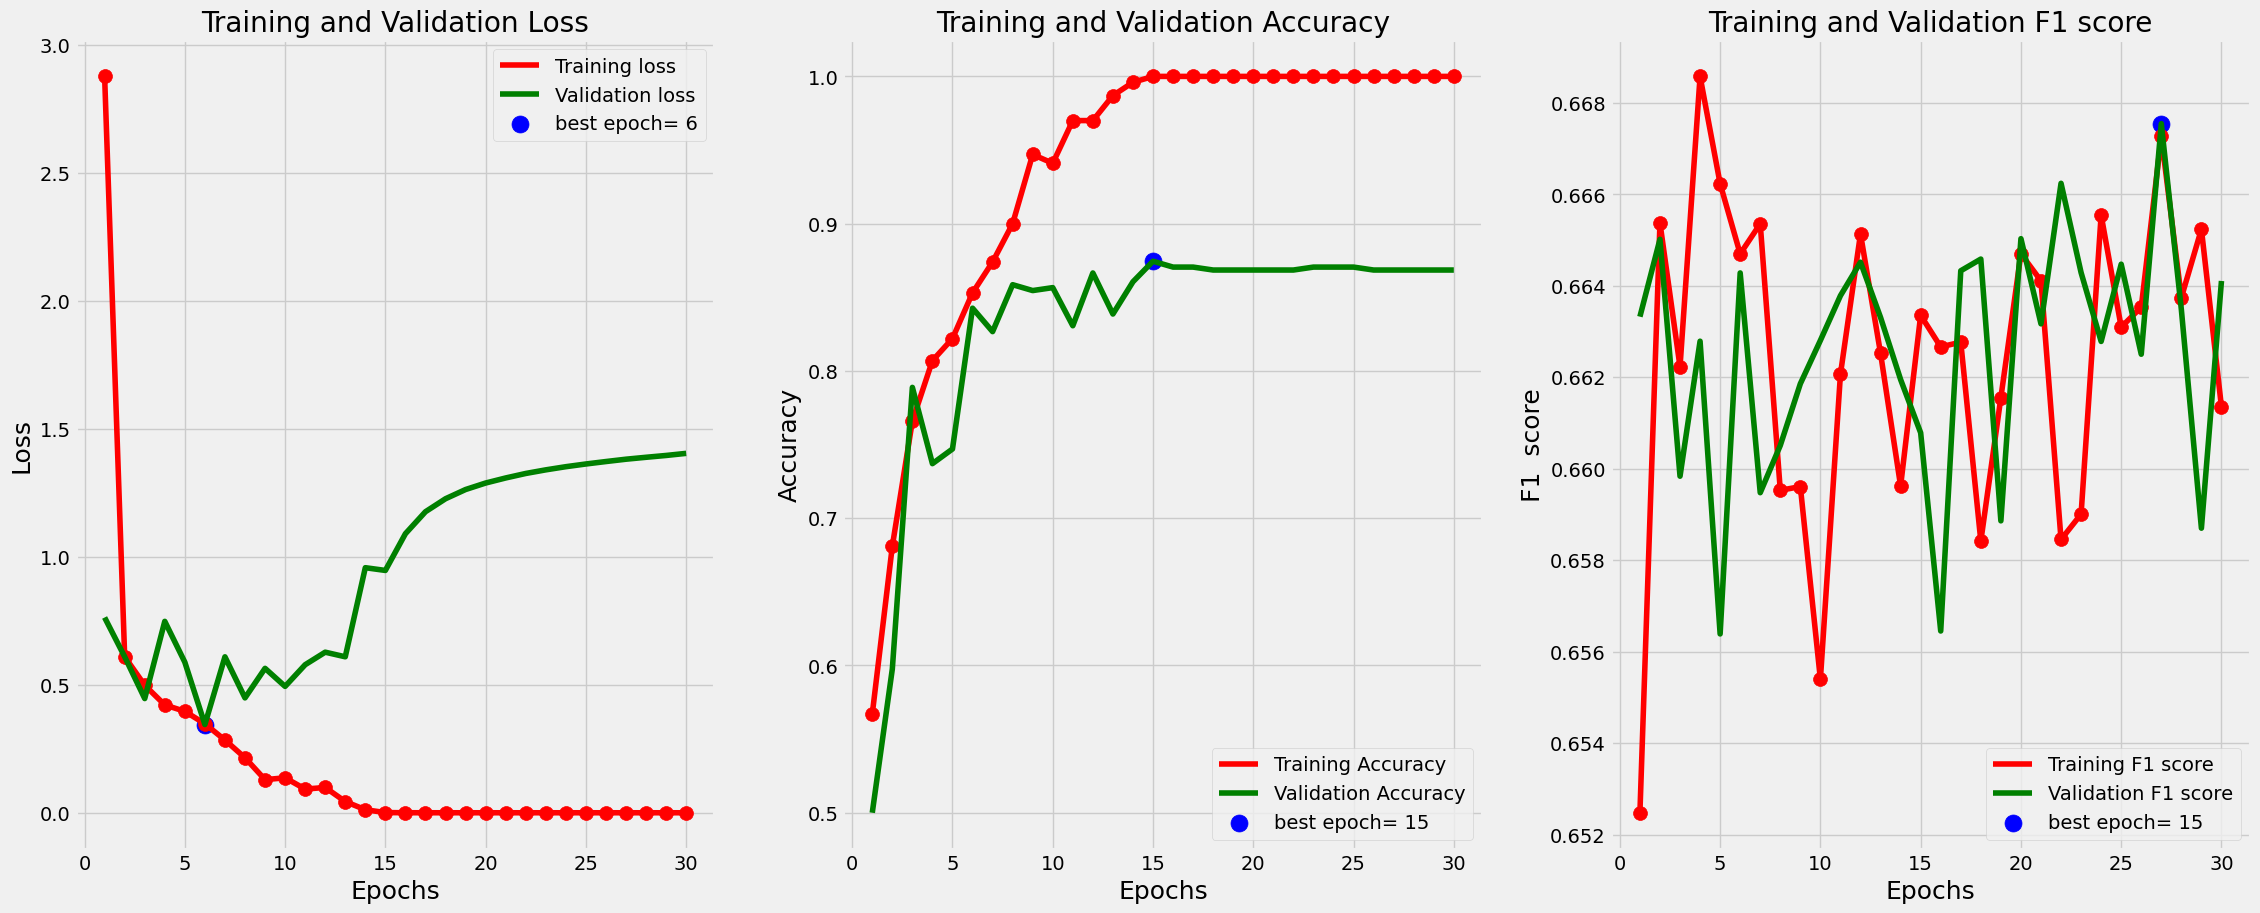

In [ ]:
tr_plot(history) # plot the training data

In [ ]:
cam_model = tf.keras.Model(model.input, outputs=(model.layers[-3].output, model.layers[-1].output))
cam_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(512, 2)

In [ ]:
def show_cam(image_value, features, results, label):
    '''
    Displays the class activation map of an image
 
    Args:
        image_value (tensor) -- preprocessed input image with size 224 x 224
        features (array) -- features of the image, shape (1, 7, 7, 512)
        results (array) -- output of the sigmoid layer
    '''
    features_for_img = features[0]
    prediction = results[0]
 
    class_activation_weigths = gap_weights[:,label]
    class_activation_features = sp.ndimage.zoom(features_for_img, (224/7, 224/7, 1), order=2)
    cam_output = np.dot(class_activation_features, class_activation_weigths)
    cam_output = tf.reshape(cam_output, (224,224))
 
    # visualize the results
    print(f'sigmoid output: {results}')
    print(f"prediction: {'fake' if tf.argmax(results[0]) else 'real'}")
    plt.figure(figsize=(8,8))
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
    plt.imshow(tf.squeeze(image_value), alpha=0.5)
    plt.show()

In [ ]:
# preprocess the test images
augmented_test_data = test_ds.map(normalize_and_resize)
test_batches = augmented_test_data.batch(1)

ground truth: real
1/1 [==============================] - 1s 777ms/step
sigmoid output: [[9.148154e-08 9.999999e-01]]
prediction: fake


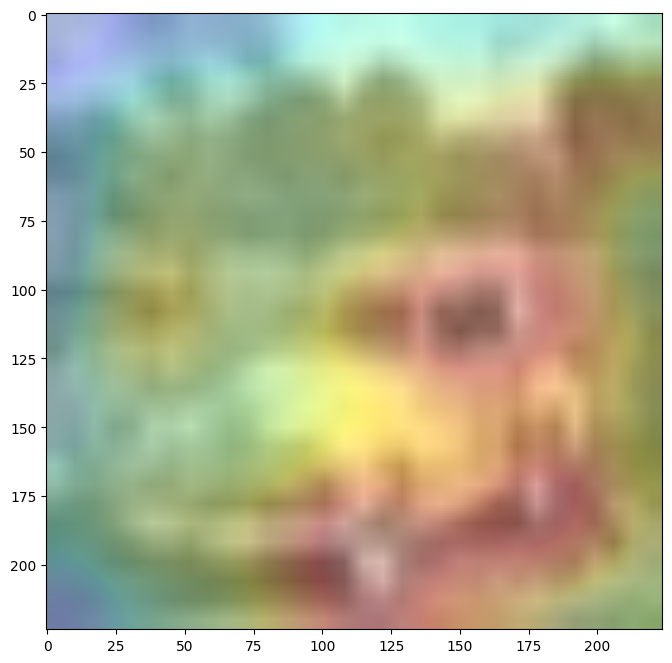

ground truth: real
1/1 [==============================] - 0s 33ms/step
sigmoid output: [[1.1474237e-05 9.9998856e-01]]
prediction: fake


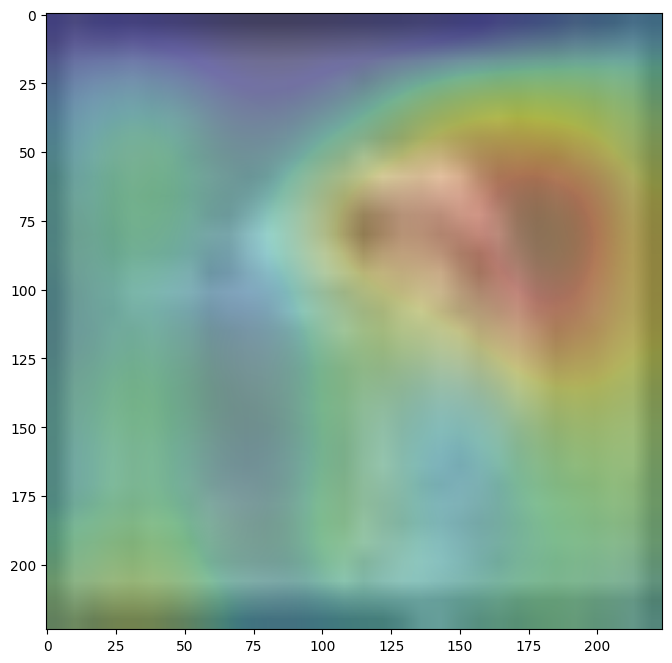

ground truth: real
1/1 [==============================] - 0s 25ms/step
sigmoid output: [[8.855051e-08 9.999999e-01]]
prediction: fake


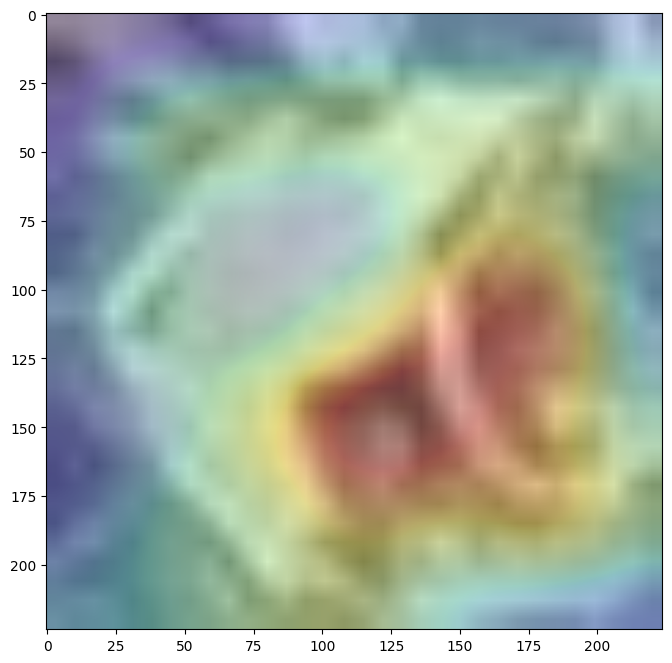

ground truth: fake
1/1 [==============================] - 0s 26ms/step
sigmoid output: [[4.6462092e-06 9.9999535e-01]]
prediction: fake


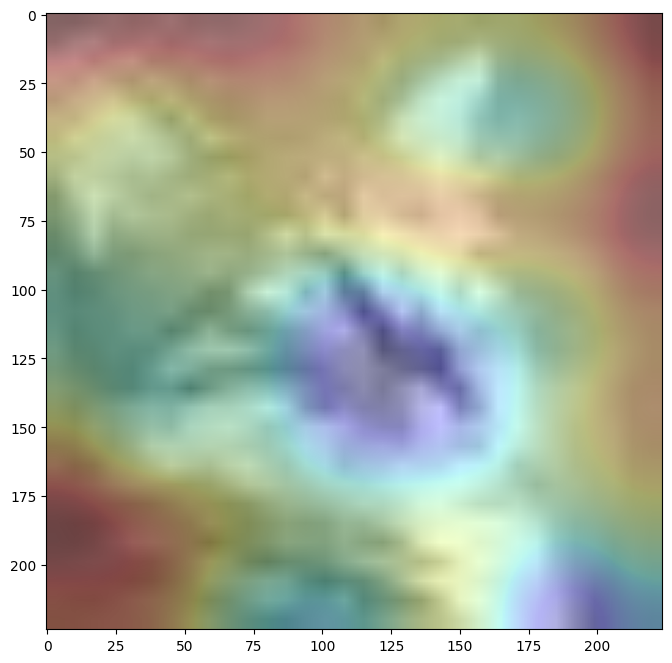

ground truth: fake
1/1 [==============================] - 0s 33ms/step
sigmoid output: [[2.0739178e-06 9.9999797e-01]]
prediction: fake


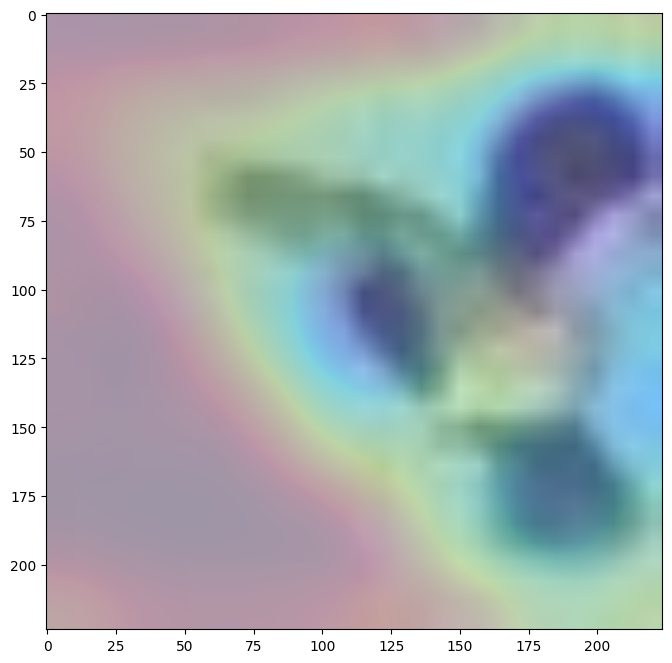

In [ ]:
for img, lbl in test_batches.take(5):
    print(f"ground truth: {'real' if lbl else 'fake'}")
    features,results = cam_model.predict(img)
    show_cam(img, features, results, lbl)


---

2. EfficientNetB0 + Grad-CAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive")

Mounted at /content/drive


In [ ]:
!pip install click opencv-python matplotlib tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/kazuto1011/grad-cam-pytorch.git

Cloning into 'grad-cam-pytorch'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 43.58 MiB | 3.43 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [ ]:
import math
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
import torchsummary
from torchsummary import summary
import torchvision
from torchvision import transforms, datasets

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # set gpu

In [ ]:
def relu_fn(x):
    """ Swish activation function """
    return x * torch.sigmoid(x)

In [ ]:
class Conv2dSamePadding(nn.Conv2d):
    """ 2D Convolutions like TensorFlow """
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super().__init__(in_channels, out_channels, kernel_size, stride, 0, dilation, groups, bias)

    def forward(self, x):
        ih, iw = x.size()[-2:]
        kh, kw = self.weight.size()[-2:]
        sh, sw = self.stride
        oh, ow = math.ceil(ih / sh), math.ceil(iw / sw)
        pad_h = max((oh - 1) * self.stride[0] + (kh - 1) * self.dilation[0] + 1 - ih, 0)
        pad_w = max((ow - 1) * self.stride[1] + (kw - 1) * self.dilation[1] + 1 - iw, 0)
        if pad_h > 0 or pad_w > 0:
            x = F.pad(x, [pad_w//2, pad_w - pad_w//2, pad_h//2, pad_h - pad_h//2])
        return F.conv2d(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)


In [ ]:
def drop_connect(inputs, p, training):
    """ Drop connect. """
    if not training: return inputs
    batch_size = inputs.shape[0]
    keep_prob = 1 - p
    random_tensor = keep_prob
    random_tensor += torch.rand([batch_size, 1, 1, 1], dtype=inputs.dtype)  # uniform [0,1)
    binary_tensor = torch.floor(random_tensor)
    binary_tensor = binary_tensor.to(device)
    output = inputs / keep_prob * binary_tensor
    return output

In [ ]:
class MBConvBlock(nn.Module):
    """
    Mobile Inverted Residual Bottleneck Block
    """

    def __init__(self, kernel_size, stride, expand_ratio, input_filters, output_filters, se_ratio, drop_n_add):
        super().__init__()
        
        self._bn_mom = 0.1
        self._bn_eps = 1e-03
        self.has_se = (se_ratio is not None) and (0 < se_ratio <= 1)
        self.expand_ratio = expand_ratio
        self.drop_n_add = drop_n_add

        # Filter Expansion phase
        inp = input_filters  # number of input channels
        oup = input_filters * expand_ratio  # number of output channels
        if expand_ratio != 1: # add it except at first block 
            self._expand_conv = Conv2dSamePadding(in_channels=inp, out_channels=oup, kernel_size=1, bias=False)
            self._bn0 = nn.BatchNorm2d(num_features=oup, momentum=self._bn_mom, eps=self._bn_eps)

        # Depthwise convolution phase
        k = kernel_size
        s = stride
        self._depthwise_conv = Conv2dSamePadding(
            in_channels=oup, out_channels=oup, groups=oup,  # groups makes it depthwise(conv filter by filter)
            kernel_size=k, stride=s, bias=False)
        self._bn1 = nn.BatchNorm2d(num_features=oup, momentum=self._bn_mom, eps=self._bn_eps)

        # Squeeze and Excitation layer, if desired
        if self.has_se:
            num_squeezed_channels = max(1,int(input_filters * se_ratio))  # input channel * 0.25 ex) block2 => 16 * 0.25 = 4
            self._se_reduce = Conv2dSamePadding(in_channels=oup, out_channels=num_squeezed_channels, kernel_size=1)
            self._se_expand = Conv2dSamePadding(in_channels=num_squeezed_channels, out_channels=oup, kernel_size=1)

        # Output phase
        final_oup = output_filters
        self._project_conv = Conv2dSamePadding(in_channels=oup, out_channels=final_oup, kernel_size=1, bias=False)
        self._bn2 = nn.BatchNorm2d(num_features=final_oup, momentum=self._bn_mom, eps=self._bn_eps)
    def forward(self, inputs, drop_connect_rate=0.2):

        # Expansion and Depthwise Convolution
        x = inputs
        if self.expand_ratio != 1:
            x = relu_fn(self._bn0(self._expand_conv(inputs)))
        x = relu_fn(self._bn1(self._depthwise_conv(x)))

        # Squeeze and Excitation
        if self.has_se:
            x_squeezed = F.adaptive_avg_pool2d(x, 1)
            x_squeezed = self._se_expand(relu_fn(self._se_reduce(x_squeezed)))
            x = torch.sigmoid(x_squeezed) * x
            
        # Output phase
        x = self._bn2(self._project_conv(x))

        # Skip connection and drop connect
        if self.drop_n_add == True:
            if drop_connect_rate:
                x = drop_connect(x, p=drop_connect_rate, training=self.training)
            x = x + inputs  # skip connection
        return x

1. EfficientNet 모델 구성 과정에서 Block 구성 적용

Maybe modifying the code below to fit 32x32 is a better solution, because this allows the model to be trained faster.

    blocks_args = [
        'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
        'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
        'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
        'r1_k3_s11_e6_i192_o320_se0.25',
    ]

In [ ]:
class EfficientNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Batch norm parameters
        bn_mom = 0.1
        bn_eps = 1e-03

        # stem
        in_channels = 3
        out_channels = 32
        self._conv_stem = Conv2dSamePadding(in_channels, out_channels, kernel_size=3, stride=2, bias=False)
        self._bn0 = nn.BatchNorm2d(num_features=out_channels, momentum=bn_mom, eps=bn_eps)

        # Build blocks
        self._blocks = nn.ModuleList([]) # list 형태로 model 구성할 때
        # stage2 r1_k3_s11_e1_i32_o16_se0.25
        self._blocks.append(MBConvBlock(kernel_size=3, stride=1, expand_ratio=1, input_filters=32, output_filters=16, se_ratio=0.25, drop_n_add=False))
        # stage3 r2_k3_s22_e6_i16_o24_se0.25
        self._blocks.append(MBConvBlock(3, 2, 6, 16, 24, 0.25, False))
        self._blocks.append(MBConvBlock(3, 1, 6, 24, 24, 0.25, True))
        # stage4 r2_k5_s22_e6_i24_o40_se0.25
        self._blocks.append(MBConvBlock(5, 2, 6, 24, 40, 0.25, False))
        self._blocks.append(MBConvBlock(5, 1, 6, 40, 40, 0.25, True))
        # stage5 r3_k3_s22_e6_i40_o80_se0.25
        self._blocks.append(MBConvBlock(3, 2, 6, 40, 80, 0.25, False))
        self._blocks.append(MBConvBlock(3, 1, 6, 80, 80, 0.25, True))
        self._blocks.append(MBConvBlock(3, 1, 6, 80, 80, 0.25, True))
        # stage6 r3_k5_s11_e6_i80_o112_se0.25
        self._blocks.append(MBConvBlock(5, 1, 6, 80,  112, 0.25, False))
        self._blocks.append(MBConvBlock(5, 1, 6, 112, 112, 0.25, True))
        self._blocks.append(MBConvBlock(5, 1, 6, 112, 112, 0.25, True))
        # stage7 r4_k5_s22_e6_i112_o192_se0.25
        self._blocks.append(MBConvBlock(5, 2, 6, 112, 192, 0.25, False))
        self._blocks.append(MBConvBlock(5, 1, 6, 192, 192, 0.25, True))
        self._blocks.append(MBConvBlock(5, 1, 6, 192, 192, 0.25, True))
        self._blocks.append(MBConvBlock(5, 1, 6, 192, 192, 0.25, True))
        # stage8 r1_k3_s11_e6_i192_o320_se0.25
        self._blocks.append(MBConvBlock(3, 1, 6, 192, 320, 0.25, False))

        # Head 
        in_channels = 320
        out_channels = 1280
        self._conv_head = Conv2dSamePadding(in_channels, out_channels, kernel_size=1, bias=False)
        self._bn1 = nn.BatchNorm2d(num_features=out_channels, momentum=bn_mom, eps=bn_eps)

        # Final linear layer
        self._dropout = 0.2
        self._num_classes = 10
        self._fc = nn.Linear(out_channels, self._num_classes)

    def extract_features(self, inputs):
        """ Returns output of the final convolution layer """

        # Stem
        x = relu_fn(self._bn0(self._conv_stem(inputs)))

        # Blocks
        for idx, block in enumerate(self._blocks):          
            x = block(x)
        return x

    def forward(self, inputs):
        """ Calls extract_features to extract features, applies final linear layer, and returns logits. """

        # Convolution layers
        x = self.extract_features(inputs)

        # Head
        x = relu_fn(self._bn1(self._conv_head(x)))
        x = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        if self._dropout:
            x = F.dropout(x, p=self._dropout, training=self.training)
        x = self._fc(x)
        return x

In [ ]:
model = EfficientNet().to(device)
summary(model,(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
 Conv2dSamePadding-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
 Conv2dSamePadding-3           [-1, 32, 32, 32]             288
       BatchNorm2d-4           [-1, 32, 32, 32]              64
 Conv2dSamePadding-5              [-1, 8, 1, 1]             264
 Conv2dSamePadding-6             [-1, 32, 1, 1]             288
 Conv2dSamePadding-7           [-1, 16, 32, 32]             512
       BatchNorm2d-8           [-1, 16, 32, 32]              32
       MBConvBlock-9           [-1, 16, 32, 32]               0
Conv2dSamePadding-10           [-1, 96, 32, 32]           1,536
      BatchNorm2d-11           [-1, 96, 32, 32]             192
Conv2dSamePadding-12           [-1, 96, 16, 16]             864
      BatchNorm2d-13           [-1, 96, 16, 16]             192
Conv2dSamePadding-14              [-1, 

In [ ]:
batch_size = 32

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Tensor Transforms (with Augmentation) and Pytorch Preprocessing:
train_ds = datasets.ImageFolder("/content/drive/MyDrive/cifake/cifake/train", transform=transform)
valid_ds = datasets.ImageFolder("/content/drive/MyDrive/cifake/cifake/valid", transform=transform)
test_ds = datasets.ImageFolder("/content/drive/MyDrive/cifake/cifake/test", transform=transform)

# Data Loaders:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False,  num_workers=2)
test_loader  = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
# hyper-parameters
num_epochs = 20 
num_batches = len(train_loader)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_train_acc = []
list_val_acc = []
train_total = 0
val_total= 0
train_correct = 0
val_correct = 0

for epoch in range(num_epochs):
    trn_loss = 0.0
    train_total = 0
    val_total= 0
    train_correct = 0
    val_correct = 0
    for i, data in enumerate(train_loader):
        x, labels = data
        x = x.to(device)
        labels = labels.to(device)
        # grad init
        optimizer.zero_grad()
        # forward propagation
        model_output = model(x)
        # calculate acc
        _, predicted = torch.max(model_output.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        # calculate loss
        loss = criterion(model_output, labels)
        # back propagation 
        loss.backward()
        # weight update
        optimizer.step()
        
        # trn_loss summary
        trn_loss += loss.item()
        # del (memory issue)
        del loss
        del model_output
        if (i+1) % 100 == 0:
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total)) 
        
        # 학습과정 출력
        if (i+1) % 100 == 0: # every 100 mini-batches
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                for j, val in enumerate(valid_loader):
                    val_x, val_labels = val
                    val_x = val_x.to(device)
                    val_labels = val_labels.to(device)
                    val_output = model(val_x)
                    # calculate acc
                    _, predicted = torch.max(val_output.data, 1)
                    val_total += val_labels.size(0)
                    val_correct += (predicted == val_labels).sum().item()

                    v_loss = criterion(val_output, val_labels)
                    val_loss += v_loss
                       
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}% | val loss: {:.4f} | val acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total, 
                         val_loss / len(valid_loader), 100 * val_correct / val_total))          
    list_epoch.append(epoch+1)
    list_train_loss.append(trn_loss/num_batches)
    list_val_loss.append(val_loss/len(valid_loader))
    list_train_acc.append(100 * train_correct / train_total)
    list_val_acc.append(100 * val_correct / val_total)
    torch.save(model, f'{epoch+1}model.pth')

epoch: 1/10 | batch: 100 | trn loss: 0.7421 | trn acc: 62.8750%
epoch: 1/10 | batch: 100 | trn loss: 0.7421 | trn acc: 62.8750% | val loss: 0.9207 | val acc: 49.8978%
epoch: 1/10 | batch: 200 | trn loss: 0.6326 | trn acc: 68.6562%
epoch: 1/10 | batch: 200 | trn loss: 0.6326 | trn acc: 68.6562% | val loss: 1.3162 | val acc: 50.3984%
epoch: 1/10 | batch: 300 | trn loss: 0.5712 | trn acc: 72.5417%
epoch: 1/10 | batch: 300 | trn loss: 0.5712 | trn acc: 72.5417% | val loss: 1.1352 | val acc: 50.7356%
epoch: 2/10 | batch: 100 | trn loss: 0.3898 | trn acc: 82.7500%
epoch: 2/10 | batch: 100 | trn loss: 0.3898 | trn acc: 82.7500% | val loss: 1.2093 | val acc: 51.6960%
epoch: 2/10 | batch: 200 | trn loss: 0.3685 | trn acc: 83.9688%
epoch: 2/10 | batch: 200 | trn loss: 0.3685 | trn acc: 83.9688% | val loss: 1.2149 | val acc: 51.9309%
epoch: 2/10 | batch: 300 | trn loss: 0.3623 | trn acc: 84.4896%
epoch: 2/10 | batch: 300 | trn loss: 0.3623 | trn acc: 84.4896% | val loss: 1.5948 | val acc: 51.9207

In [ ]:
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
# hyper-parameters
num_epochs = 20 
num_batches = len(train_loader)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_train_acc = []
list_val_acc = []
train_total = 0
val_total= 0
train_correct = 0
val_correct = 0

for epoch in range(num_epochs):
    trn_loss = 0.0
    train_total = 0
    val_total= 0
    train_correct = 0
    val_correct = 0
    for i, data in enumerate(train_loader):
        x, labels = data
        x = x.to(device)
        labels = labels.to(device)
        # grad init
        optimizer.zero_grad()
        # forward propagation
        model_output = model(x)
        # calculate acc
        _, predicted = torch.max(model_output.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        # calculate loss
        loss = criterion(model_output, labels)
        # back propagation 
        loss.backward()
        # weight update
        optimizer.step()
        
        # trn_loss summary
        trn_loss += loss.item()
        # del (memory issue)
        del loss
        del model_output
        if (i+1) % 100 == 0:
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total)) 
        
        # 학습과정 출력
        if (i+1) % 100 == 0: # every 100 mini-batches
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                for j, val in enumerate(valid_loader):
                    val_x, val_labels = val
                    val_x = val_x.to(device)
                    val_labels = val_labels.to(device)
                    val_output = model(val_x)
                    # calculate acc
                    _, predicted = torch.max(val_output.data, 1)
                    val_total += val_labels.size(0)
                    val_correct += (predicted == val_labels).sum().item()

                    v_loss = criterion(val_output, val_labels)
                    val_loss += v_loss
                       
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}% | val loss: {:.4f} | val acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total, 
                         val_loss / len(valid_loader), 100 * val_correct / val_total))          
    list_epoch.append(epoch+1)
    list_train_loss.append(trn_loss/num_batches)
    list_val_loss.append(val_loss/len(valid_loader))
    list_train_acc.append(100 * train_correct / train_total)
    list_val_acc.append(100 * val_correct / val_total)
    torch.save(model, f'{epoch+1}model.pth')

epoch: 1/20 | batch: 100 | trn loss: 0.1075 | trn acc: 95.5938%
epoch: 1/20 | batch: 100 | trn loss: 0.1075 | trn acc: 95.5938% | val loss: 3.3878 | val acc: 63.3020%
epoch: 1/20 | batch: 200 | trn loss: 0.1184 | trn acc: 95.3438%
epoch: 1/20 | batch: 200 | trn loss: 0.1184 | trn acc: 95.3438% | val loss: 2.1453 | val acc: 63.8537%
epoch: 1/20 | batch: 300 | trn loss: 0.1149 | trn acc: 95.5938%
epoch: 1/20 | batch: 300 | trn loss: 0.1149 | trn acc: 95.5938% | val loss: 2.6609 | val acc: 63.8673%
epoch: 2/20 | batch: 100 | trn loss: 0.0789 | trn acc: 97.1250%
epoch: 2/20 | batch: 100 | trn loss: 0.0789 | trn acc: 97.1250% | val loss: 3.0332 | val acc: 63.4450%
epoch: 2/20 | batch: 200 | trn loss: 0.0849 | trn acc: 97.0156%
epoch: 2/20 | batch: 200 | trn loss: 0.0849 | trn acc: 97.0156% | val loss: 2.5421 | val acc: 65.3147%
epoch: 2/20 | batch: 300 | trn loss: 0.1191 | trn acc: 95.5729%
epoch: 2/20 | batch: 300 | trn loss: 0.1191 | trn acc: 95.5729% | val loss: 2.4627 | val acc: 65.2636

In [ ]:
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
# hyper-parameters
num_epochs = 20 
num_batches = len(train_loader)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_train_acc = []
list_val_acc = []
train_total = 0
val_total= 0
train_correct = 0
val_correct = 0

for epoch in range(num_epochs):
    trn_loss = 0.0
    train_total = 0
    val_total= 0
    train_correct = 0
    val_correct = 0
    for i, data in enumerate(train_loader):
        x, labels = data
        x = x.to(device)
        labels = labels.to(device)
        # grad init
        optimizer.zero_grad()
        # forward propagation
        model_output = model(x)
        # calculate acc
        _, predicted = torch.max(model_output.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        # calculate loss
        loss = criterion(model_output, labels)
        # back propagation 
        loss.backward()
        # weight update
        optimizer.step()
        
        # trn_loss summary
        trn_loss += loss.item()
        # del (memory issue)
        del loss
        del model_output
        if (i+1) % 100 == 0:
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total)) 
        
        # 학습과정 출력
        if (i+1) % 100 == 0: # every 100 mini-batches
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                for j, val in enumerate(valid_loader):
                    val_x, val_labels = val
                    val_x = val_x.to(device)
                    val_labels = val_labels.to(device)
                    val_output = model(val_x)
                    # calculate acc
                    _, predicted = torch.max(val_output.data, 1)
                    val_total += val_labels.size(0)
                    val_correct += (predicted == val_labels).sum().item()

                    v_loss = criterion(val_output, val_labels)
                    val_loss += v_loss
                       
            print("epoch: {}/{} | batch: {} | trn loss: {:.4f} | trn acc: {:.4f}% | val loss: {:.4f} | val acc: {:.4f}%".
                  format(epoch+1, num_epochs, i+1,  trn_loss / i, 100 * train_correct / train_total, 
                         val_loss / len(valid_loader), 100 * val_correct / val_total))          
    list_epoch.append(epoch+1)
    list_train_loss.append(trn_loss/num_batches)
    list_val_loss.append(val_loss/len(valid_loader))
    list_train_acc.append(100 * train_correct / train_total)
    list_val_acc.append(100 * val_correct / val_total)
    torch.save(model, f'{epoch+1}model.pth')

epoch: 1/20 | batch: 100 | trn loss: 0.0354 | trn acc: 98.8125%
epoch: 1/20 | batch: 100 | trn loss: 0.0354 | trn acc: 98.8125% | val loss: 4.7069 | val acc: 70.8214%
epoch: 1/20 | batch: 200 | trn loss: 0.0358 | trn acc: 98.7500%
epoch: 1/20 | batch: 200 | trn loss: 0.0358 | trn acc: 98.7500% | val loss: 4.9678 | val acc: 69.7998%
epoch: 1/20 | batch: 300 | trn loss: 0.0340 | trn acc: 98.7812%
epoch: 1/20 | batch: 300 | trn loss: 0.0340 | trn acc: 98.7812% | val loss: 4.5716 | val acc: 70.6307%
epoch: 2/20 | batch: 100 | trn loss: 0.0314 | trn acc: 98.9062%
epoch: 2/20 | batch: 100 | trn loss: 0.0314 | trn acc: 98.9062% | val loss: 4.7858 | val acc: 70.5966%
epoch: 2/20 | batch: 200 | trn loss: 0.0324 | trn acc: 98.7500%
epoch: 2/20 | batch: 200 | trn loss: 0.0324 | trn acc: 98.7500% | val loss: 4.4776 | val acc: 71.3016%
epoch: 2/20 | batch: 300 | trn loss: 0.0315 | trn acc: 98.7812%
epoch: 2/20 | batch: 300 | trn loss: 0.0315 | trn acc: 98.7812% | val loss: 5.1817 | val acc: 70.9508

In [ ]:
torch.save(model, '/content/drive/MyDrive/efficientNet_weight/model.pth')

In [ ]:
os.chdir("/content/drive/MyDrive/grad-cam-pytorch")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
<ipython-input-55-8801e750643e>:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  heatmap = (heatmap.astype(np.float) + raw_image.astype(np.float)) / 2


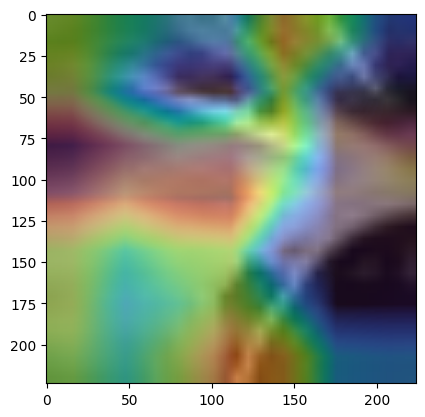

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from grad_cam import GradCAM

target_layer = "_blocks.15"
model.eval()

# Images
image = Image.open("/content/drive/MyDrive/cifake_local/cifake/valid/fake/valid_fake_0.jpg")
raw_image = np.asarray(transforms.Compose(
    [
       transforms.Resize(224),
    ])(image))
image = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)(image)
images = torch.stack([image]).to(device)

gcam = GradCAM(model=model)
_, sorted_ids = gcam.forward(images)
ids_1st = sorted_ids[:, [0]]

gcam.backward(ids=ids_1st)
heatmap = gcam.generate(target_layer=target_layer)
heatmap = heatmap.cpu().numpy().squeeze()
heatmap = cm.turbo(heatmap)[..., :3] * 255.0
heatmap = (heatmap.astype(np.float) + raw_image.astype(np.float)) / 2
plt.imshow(np.uint8(heatmap))
plt.show()

---

#### 3. EfficientNetV2 

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import cv2
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
def print_in_color(txt_msg,fore_tupple= (0,255,255) ,back_tupple=(0,0,0)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat))
    print('\33[0m', end='') # returns default print color to back to black

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive")


Mounted at /content/drive


In [ ]:
limiter = 5000
test_dir=r'/content/drive/MyDrive/cifake/cifake/test'
train_dir=r'/content/drive/MyDrive/cifake/cifake/train'
classes=sorted(os.listdir(train_dir))
print('there are ', len(classes), ' classes ', classes[0], ' and ', classes[1])
dir_list=[train_dir, test_dir]
names=['train', 'test']
zip_list=zip(names, dir_list)
for name, dir in zip_list:
    filepaths=[]
    labels=[]
    class_list=sorted(os.listdir(dir))
    for klass in class_list:
        classpath=os.path.join(dir, klass)
        flist=sorted(os.listdir(classpath))
        if name == 'train':
            flist=np.random.choice(flist, limiter, replace=False) # randomly select limiter number of files from train_dir for each class
        else : flist=np.random.choice(flist, 2000, replace=False) 
        desc=f'{name}-{klass}'
        for f in tqdm(flist, ncols=100, colour='blue', unit='files', desc=desc):
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
        
 
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    if name == 'train':
        train_df=pd.concat([Fseries, Lseries], axis=1)
        train_df, valid_df=train_test_split(train_df, test_size=.2, shuffle=True, random_state=123, stratify=train_df['labels'])
    else:  
        test_df=pd.concat([Fseries, Lseries], axis=1)
print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df)) 

there are  2  classes  fake  and  real


test-real: 100%|█████████████████████████████████████████| 2000/2000 [00:00<00:00, 496837.72files/s]

train_df length:  8000   test_df length:  4000   valid_df length:  2000


In [ ]:
gen=ImageDataGenerator()
# I will be using an EfficientNet model which requires a minimum image size of 32 X 32
img_size=(32,32)
bs=100 # set the batch size
train_gen=gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                 class_mode= 'categorical', color_mode='rgb', shuffle=True, batch_size=bs)
valid_gen=gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                 class_mode= 'categorical', color_mode='rgb', shuffle=False, batch_size=bs)
test_gen=gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                 class_mode= 'categorical', color_mode='rgb', shuffle=False, batch_size=bs)
labels=test_gen.labels

Found 8000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


In [ ]:
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
img_shape=(img_size[0], img_size[1], 3)
base_model=tf.keras.applications.EfficientNetV2B0(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(2, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy', F1_score]) 

In [ ]:
class LR_ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch, batches, dwell=True, factor=.4): # initialization of the callback
        super(LR_ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        self.lowest_vloss=np.inf
        self.lowest_aloss=np.inf
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.best_epoch=1        
        self.dwell= dwell
        self.factor=factor
        self.header=True
        self.batches=batches
    
    def on_train_begin(self, logs=None): # this runs on the beginning of training 
        msg1 =f'Training will proceed until epoch {self.ask_epoch} then you will be asked to\n'
        msg2='enter H to halt training or enter an integer for how many more epochs to run then be asked again'
        print_in_color(msg1 + msg2)
        if self.dwell:
            msg='learning rate will be automatically adjusted during training'
            print_in_color(msg, (0,255,0))
        self.start_time= time.time() # set the time at which training started
       
    def on_train_end(self, logs=None):   # runs at the end of training  
        msg=f'loading model with weights from epoch {self.best_epoch}'
        print_in_color(msg, (0,255,255))
        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color (msg) # print out training duration time
   
    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()
    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')
        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}- accuracy=  {3:5.3f} - loss: {4:8.5f}          '.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.header == True:
            msg = '{0:^7s}{1:^9s}{2:^9s}{3:^9s}{4:^10s}{5:^13s}{6:^10s}{7:^13s}{8:13s}\n'
            msg1=msg.format('Epoch', 'Train', 'Train', 'Valid', 'Valid','V_Loss %', 'Learning','Next LR' ,'Duration in')
            msg='{0:^7s}{1:^9s}{2:^9s}{3:^9s}{4:^10s}{5:^13s}{6:^10s}{7:^13s}{8:13s}'
            msg2=msg.format(' ', 'Loss', 'Accuracy', 'Loss', 'Accuracy','Improvement', 'Rate', 'Rate', '  Seconds') 
            print_in_color (msg1 + msg2)
            self.header=False
        ep_end = time.time()
        duration = ep_end - self.ep_start        
        vloss=logs.get('val_loss')  # get the validation loss for this epoch
        aloss=logs.get('loss')
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        if epoch >0:
            deltav = self.lowest_vloss- vloss 
            pimprov=(deltav/self.lowest_vloss) * 100
            deltaa=self.lowest_aloss-aloss
            aimprov=(deltaa/self.lowest_aloss) * 100            
        else:
            pimprov=0.0             
        if vloss< self.lowest_vloss:
            self.lowest_vloss=vloss
            self.best_weights=self.model.get_weights() # set best weights to model's initial weights
            self.best_epoch=epoch + 1 
            new_lr=lr
            msg = '{0:^7s}{1:^9.4f}{2:^9.2f}{3:^9.4f}{4:^10.2f}{5:^13.2f}{6:^10.6f}{7:11.6f}{8:^15.2f}'
            msg=msg.format(str(epoch+1), aloss, acc*100, vloss, v_acc*100, pimprov, lr, new_lr,duration)         
            print_in_color(msg, (0,255,0)) # green foreground
        else: # validation loss increased                     
            if self.dwell: # if dwell is True when the validation loss increases the learning rate is automatically reduced and model weights are set to best weights
                lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                new_lr=lr * self.factor
                msg = '{0:^7s}{1:^9.4f}{2:^9.2f}{3:^9.4f}{4:^10.2f}{5:^13.2f}{6:^10.6f}{7:11.6f}{8:^15.2f}'                 
                msg=msg.format(str(epoch+1), aloss, acc*100, vloss, v_acc*100, pimprov, lr, new_lr,duration) 
                print_in_color(msg, (255,255,0))                
                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                self.model.set_weights(self.best_weights) # set the weights of the model to the best weights                 
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?                
                msg='\n Enter H to end training or  an integer for the number of additional epochs to run then ask again'
                print_in_color(msg) # cyan foreground
                ans=input()
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    msg=f'you entered {ans},  Training halted on epoch {epoch+1} due to user input\n'
                    print_in_color(msg)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.header=True
                    self.ask_epoch += int(ans)
                    msg=f'you entered {ans} Training will continue to epoch {self.ask_epoch}'
                    print_in_color(msg) # cyan foreground
                    if self.dwell==False:
                        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                        msg=f'current LR is  {lr:8.6f}  hit enter to keep  this LR or enter a new LR'
                        print_in_color(msg) # cyan foreground
                        ans=input(' ')
                        if ans =='':
                            msg=f'keeping current LR of {lr:7.5f}'
                            print_in_color(msg) # cyan foreground
                        else:
                            new_lr=float(ans)
                            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                            msg=f' changing LR to {ans}'
                            print_in_color(msg) # cyan foreground

In [ ]:
ask_epoch= 10 # initially train for 10 epochs   
batches=int(len(train_df)/bs)
# instantiate the custom callback
epochs=100 # max epochs to run
ask=LR_ASK(model, epochs=epochs,  ask_epoch=ask_epoch, batches=batches) # instantiate the custom callback
callbacks=[ask] 
# train the model- don't worry aboutthe warning message your model will train correctly
history=model.fit(x=train_gen,   epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=True,  initial_epoch=0) # train the model

Training will proceed until epoch 10 then you will be asked to
enter H to halt training or enter an integer for how many more epochs to run then be asked again
learning rate will be automatically adjusted during training
 Epoch   Train    Train    Valid    Valid     V_Loss %    Learning    Next LR   Duration in  
         Loss   Accuracy   Loss    Accuracy  Improvement    Rate       Rate       Seconds    
   1    6.1005    74.65   4.3127    86.20       0.00      0.001000    0.001000     53.59     
   2    3.5538    87.34   2.8132    88.90       34.77     0.001000    0.001000     10.17     
   3    2.3457    91.55   1.9535    90.40       30.56     0.001000    0.001000     10.38     
   4    1.6263    93.31   1.4032    90.90       28.17     0.001000    0.001000     10.66     
   5    1.1558    95.23   1.0388    91.85       25.97     0.001000    0.001000     10.06     
   6    0.8399    96.28   0.7923    92.00       23.73     0.001000    0.001000     10.76     
   7    0.6195    97.22   0

In [ ]:
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['F1_score']
    vf1=tr_data.history['val_F1_score']    
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    indexf1=np.argmax(vf1)
    vf1_highest=vf1[indexf1]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch) 
    f1_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')    
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)    
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()    
    plt.tight_layout    
    plt.show()
    return 

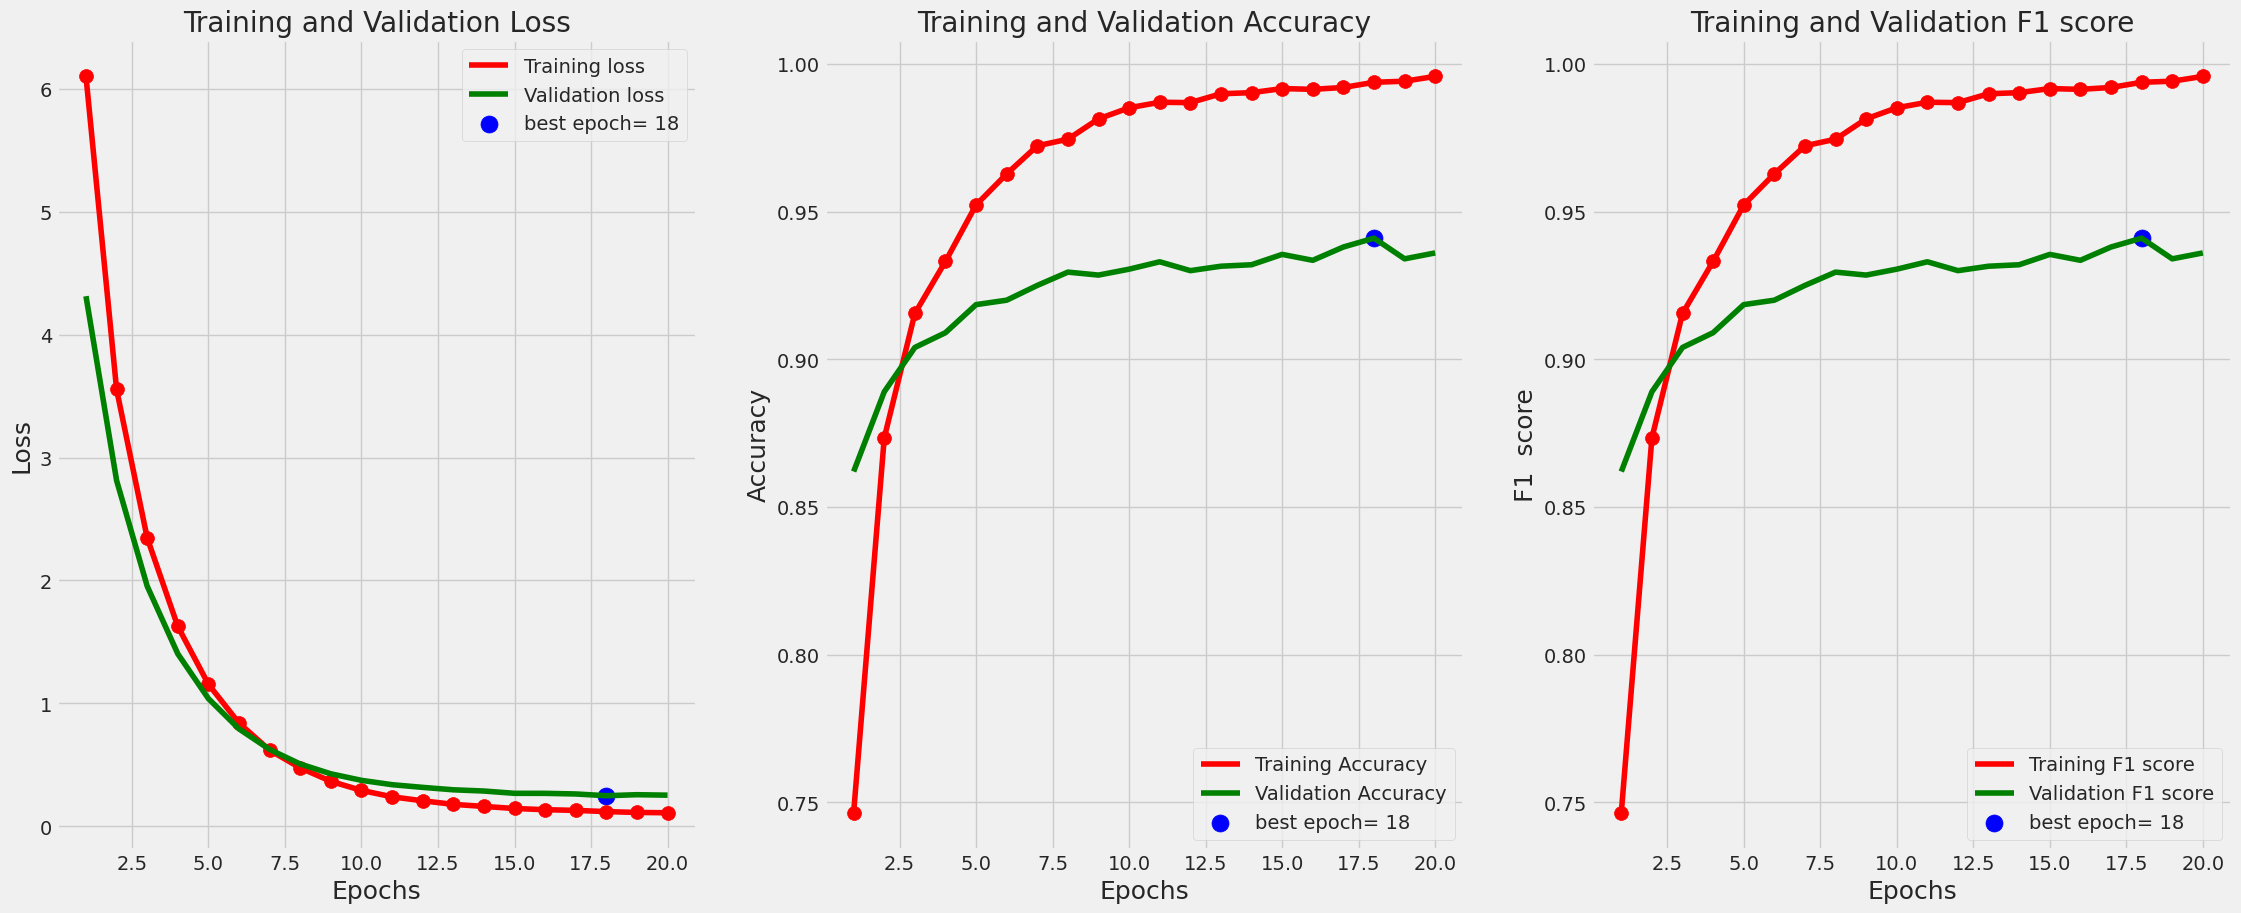

In [ ]:
tr_plot(history) # plot the training data

In [ ]:
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    test_count =len(preds)
    misclassified_classes=[]
    misclassified_files=[]
    misclassified_as = []
    pred_indices=[]
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]    
        if  pred_index != true_index:        
            errors +=1        
            misclassified_classes.append(classes[true_index])
            misclassified_as.append(classes[pred_index])
            file=test_gen.filenames[i]
            split=file.split('/')
            L=len(split)           
            f=split[L-2] +' '+ split[L-1]  
            misclassified_files.append(f)

    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels)
    ypred=np.array(pred_indices)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f} and an F1 score of {f1score:6.2f}'
    print (msg) 
    misclassified_classes=sorted(misclassified_classes)
    if len(misclassified_classes) > 0:
        misclassifications=[]
        for klass in misclassified_classes:
            mis_count=misclassified_classes.count(klass)
            misclassifications.append(mis_count)
        unique=len(np.unique(misclassified_classes)) 
        if unique==1:
            height=int(unique)
        else:
            height =int(unique/2)
        plt.figure(figsize=(10, height))
        plt.style.use('fivethirtyeight')
        plt.barh(misclassified_classes, misclassifications )
        plt.title( 'Classification Errors on Test Set by Class', fontsize=20, color='blue')
        plt.xlabel('NUMBER OF MISCLASSIFICATIONS', fontsize=20, color='blue')
        plt.ylabel('CLASS', fontsize=20, color='blue')
        plt.show()
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
        print("Classification Report:\n----------------------\n", clr)
    return f1score

40/40 [==============================] - 962s 25s/step
There were 241 errors in 4000 tests for an accuracy of  93.97 and an F1 score of  93.97


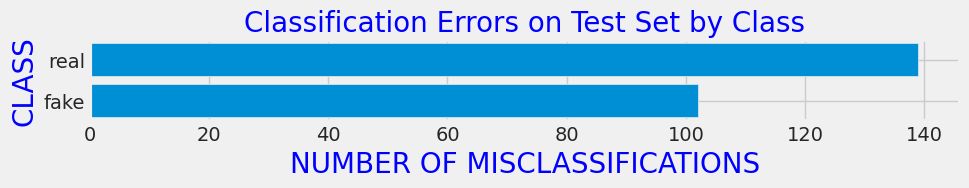

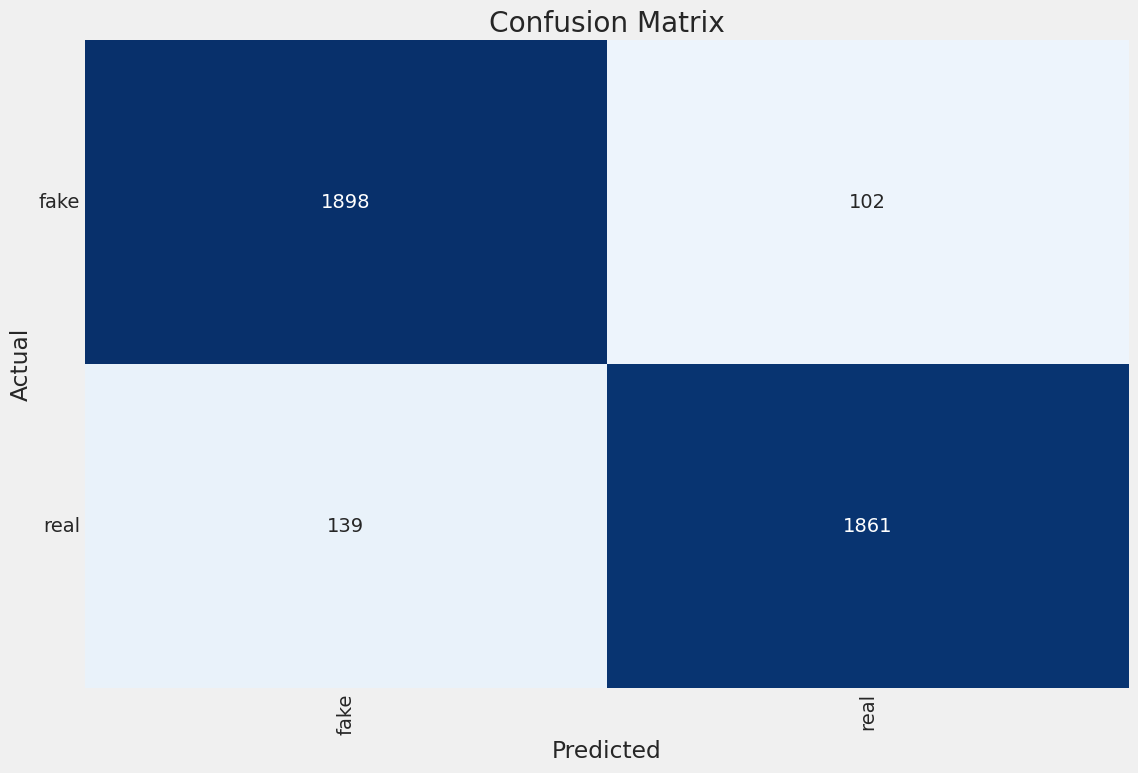

Classification Report:
----------------------
               precision    recall  f1-score   support

        fake     0.9318    0.9490    0.9403      2000
        real     0.9480    0.9305    0.9392      2000

    accuracy                         0.9397      4000
   macro avg     0.9399    0.9397    0.9397      4000
weighted avg     0.9399    0.9397    0.9397      4000



In [ ]:
f1score=predictor(model,test_gen)

---

#### 4. ViT (Vision Transformer)

In [ ]:
from google.colab import drive
import zipfile, os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = '/content/drive/MyDrive/datasets/cifake.zip'
data_path = '/content/drive/MyDrive/cifake3'
data_file = os.path.join(data_path, 'cifake.zip')

if not os.path.exists(data_path):
  os.makedirs(data_path)

with zipfile.ZipFile(data_file, 'r') as file: 
  file.extractall(data_path)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/cifake3/cifake/train',
                                              target_size=(32, 32),
                                              batch_size=32,
                                              class_mode='categorical')

validation_generator = datagen.flow_from_directory('/content/drive/MyDrive/cifake3/cifake/valid',
                                                   target_size=(32, 32),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [ ]:
def create_patches(inputs, patch_size):
    patches = tf.image.extract_patches(images=inputs,
                                       sizes=[1, patch_size, patch_size, 1],
                                       strides=[1, patch_size, patch_size, 1],
                                       rates=[1, 1, 1, 1],
                                       padding='VALID')
    patch_dim = patches.shape[-1]
    patches = tf.reshape(patches, [tf.shape(inputs)[0], -1, patch_dim])
    return patches

def patch_embedding(patches, embed_dim):
    projection = layers.Dense(embed_dim)
    embeddings = projection(patches)
    return embeddings

def add_classification_token(embeddings, embed_dim):
    batch_size = tf.shape(embeddings)[0]
    cls_token = tf.zeros((batch_size, 1, embed_dim))
    embeddings = tf.concat([cls_token, embeddings], axis=1)
    return embeddings 

def positional_embedding(sequence_length, embed_dim):
    positions = tf.range(sequence_length + 1)
    projection = layers.Embedding(sequence_length + 1, embed_dim)
    position = projection(positions)
    return position

def transformer_block(embed_dim, num_heads, sequence_length):
    inputs = keras.Input(shape=(sequence_length + 1, embed_dim))
    x1 = layers.LayerNormalization()(inputs)
    x2 = layers.MultiHeadAttention(num_heads, embed_dim)(x1, x1)
    x3 = layers.LayerNormalization()(inputs + x2)
    x4 = layers.Dense(embed_dim, activation='gelu')(x3)
    x5 = layers.Dense(embed_dim, activation='gelu')(x4)
    outputs = layers.LayerNormalization()(x3 + x5)
    return keras.Model(inputs=inputs, outputs=outputs)

def vision_transformer(image_size, patch_size, embed_dim, num_heads, sequence_length):
    inputs = keras.Input(shape=(image_size, image_size, 3))
    patches = create_patches(inputs, patch_size)
    embeddings = patch_embedding(patches, embed_dim)
    embeddings = add_classification_token(embeddings, embed_dim)
    embeddings += positional_embedding(sequence_length, embed_dim)
    transformer = transformer_block(embed_dim, num_heads, sequence_length)
    x = transformer(embeddings)
    cls_token = x[:, 0]
    outputs = layers.Dense(2, activation='softmax')(cls_token)
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
param_grid = [,
              {'patch_size': 2, 'embed_dim': 128, 'num_heads': 12, 'sequence_length': 256},
              {'patch_size': 4, 'embed_dim': 128, 'num_heads': 8, 'sequence_length': 64},
              {'patch_size': 4, 'embed_dim': 128, 'num_heads': 12, 'sequence_length': 64}]
models = []
for params in param_grid:
    model = vision_transformer(image_size=32, **params)
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    models.append(model){'patch_size': 2, 'embed_dim': 128, 'num_heads': 8, 'sequence_length': 256}

In [ ]:
history = []
for i, model in enumerate(models):
    print("Training model %d" %(i+1))
    hist = model.fit(train_generator,
                     steps_per_epoch=312,
                     epochs=20,
                     validation_data=validation_generator,
                     validation_steps=156)
    history.append(hist)

Training model 1
Epoch 1/20
312/312 [==============================] - 58s 173ms/step - loss: 0.6785 - acc: 0.5916 - val_loss: 0.5397 - val_acc: 0.7314
Epoch 2/20
312/312 [==============================] - 53s 169ms/step - loss: 0.5463 - acc: 0.7198 - val_loss: 0.5071 - val_acc: 0.7514
Epoch 3/20
312/312 [==============================] - 53s 169ms/step - loss: 0.5035 - acc: 0.7528 - val_loss: 0.4865 - val_acc: 0.7686
Epoch 4/20
312/312 [==============================] - 53s 169ms/step - loss: 0.4616 - acc: 0.7827 - val_loss: 0.4343 - val_acc: 0.7967
Epoch 5/20
312/312 [==============================] - 53s 169ms/step - loss: 0.4220 - acc: 0.8032 - val_loss: 0.3970 - val_acc: 0.8129
Epoch 6/20
312/312 [==============================] - 53s 169ms/step - loss: 0.3976 - acc: 0.8204 - val_loss: 0.3780 - val_acc: 0.8249
Epoch 7/20
312/312 [==============================] - 53s 169ms/step - loss: 0.3751 - acc: 0.8350 - val_loss: 0.3602 - val_acc: 0.8379
Epoch 8/20
312/312 [==================

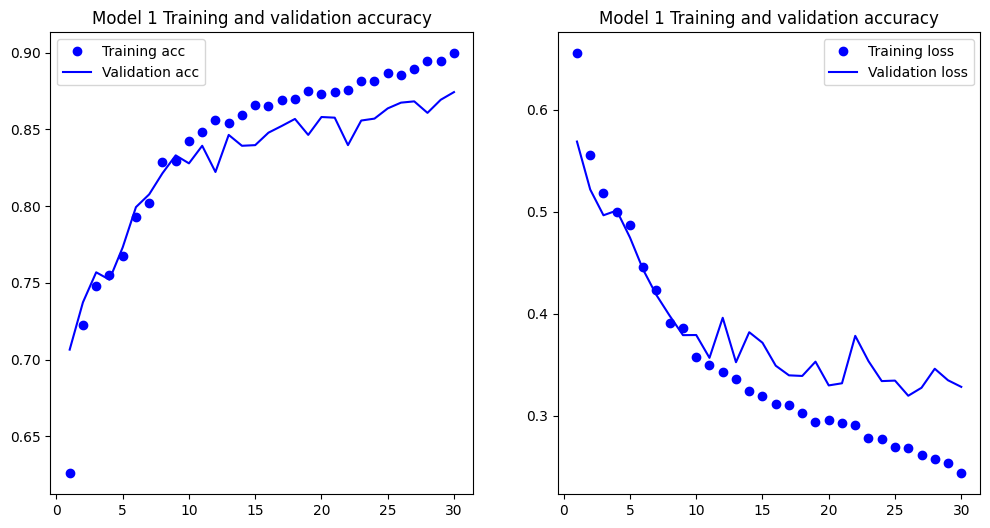

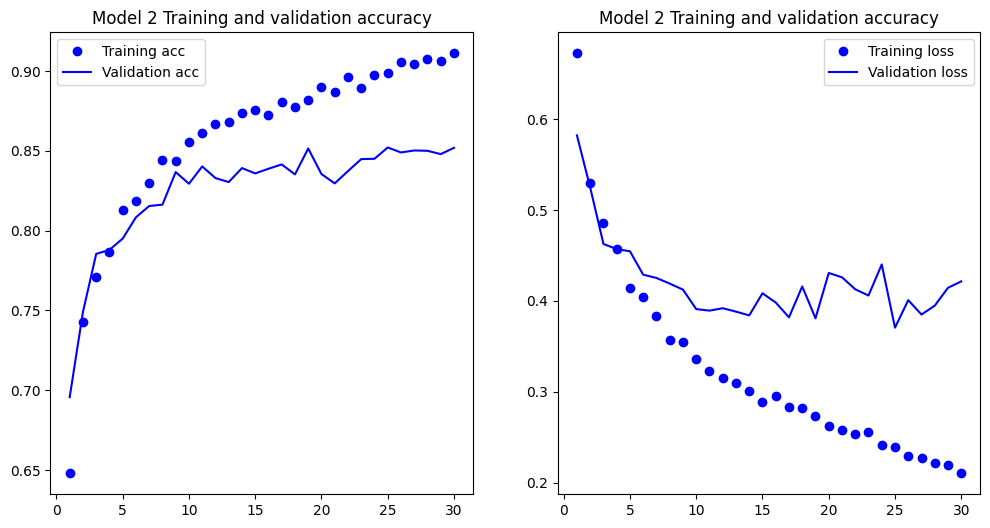

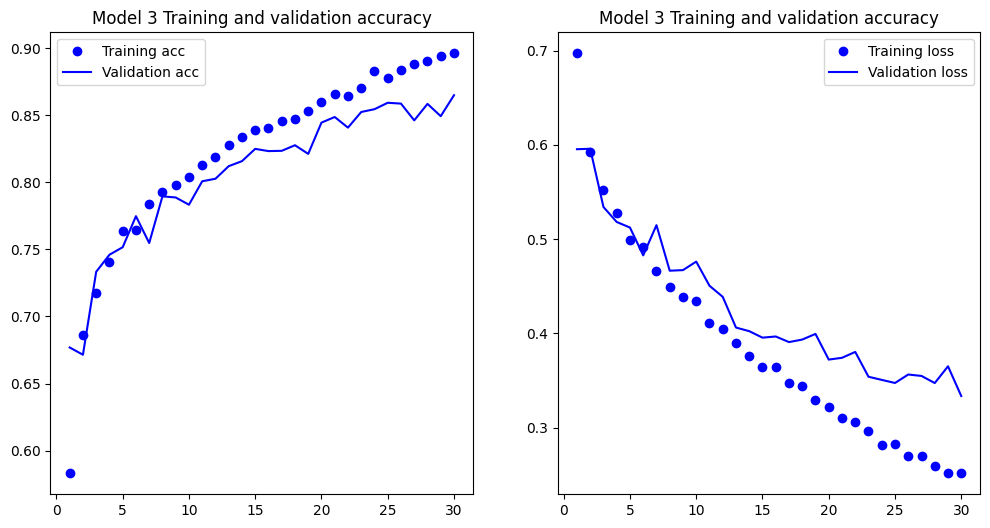

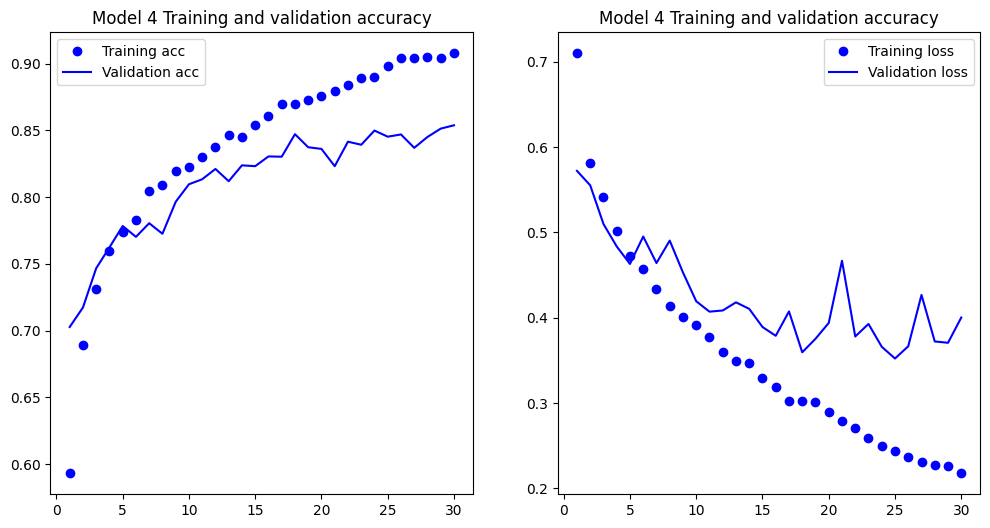

In [ ]:
for i, hist in enumerate(history):
    acc = hist.history['acc'] 
    val_acc = hist.history['val_acc'] 
    loss = hist.history['loss'] 
    val_loss = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc') 
    plt.plot(epochs, val_acc, 'b', label='Validation acc') 
    plt.title("Model %d Training and validation accuracy" %(i+1))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss') 
    plt.plot(epochs, val_loss, 'b', label='Validation loss') 
    plt.title("Model %d Training and validation accuracy" %(i+1))
    plt.legend()

    plt.show()